# 4.10.2 Coding Etiquette & Excel Reporting 

## Objective of Script

> Import Libraires and Dataframe

> Security Implications

> Customer Profiling for Market Strategy
 >- Customer Age
 >- Income Bracket
 >- Goods in Departments
      >-Baby products
      >-Alcohol
      >-Pet Owner
      >-Perishable Food
 >- Parents
 >- Family Size
 
> Customer Profile Extras
 >- Busiest Days
 >- Order Day of Week
 >- Order Hour of Day
 >- Purchase Times
 
> Visualizaions of Customer Profiles
  
> Aggregated Customer Profiles

> Customer Profiles in Regions and Departments

> Customer Profiles for Orders Day of Week and Order Hour of Day

> Customer Loyalty

> Export Data 

> Export Visualizations

# 01. Importing Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframes

In [2]:
# Import dataframes, creating shortcut to data file and verify

path = r'/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'
print(path) 

/Users/tatumzeliadt/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Immersion/4 Achievement 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis


In [3]:
# Import dataframe of high activity customers

high_activity_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

# 03. Dimension Checks

In [4]:
# Verify dimensions

high_activity_customers.shape

(30964564, 33)

In [5]:
# Verify general dataframe information

high_activity_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [6]:
# Verify first five rows of dataframe

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity


# 04. Customer Profiling for Market Strategy

## 1. Customer Age Profile

In [7]:
# Descriptive analysis of Age

high_activity_customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Customer Age Groups: 
#### 18 - 39 = Young Adults
#### 40 - 64 = Middle-aged Adults
#### 65 - 81 = Senior

In [8]:
# Define customer age categories

high_activity_customers.loc[(high_activity_customers['age'] >= 18) & (high_activity_customers['age'] < 40), 'age_group'] = 'Young Adult'

In [9]:
high_activity_customers.loc[(high_activity_customers['age'] >= 40) & (high_activity_customers['age'] < 65), 'age_group'] = 'Middle-aged Adult'

In [10]:
high_activity_customers.loc[high_activity_customers['age'] >= 65, 'age_group'] = 'Senior'

In [11]:
# Check frequency of age groups

high_activity_customers['age_group'].value_counts(dropna = False)

Middle-aged Adult    12103910
Young Adult          10665110
Senior                8195544
Name: age_group, dtype: int64

In [12]:
# Verify frequency of groups is equivalent to shape of dataframe

12103910 + 10665110 + 8195544

30964564

In [13]:
high_activity_customers.shape

(30964564, 34)

In [14]:
# Check first five rows to verify age_group column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult


## 2. Customer Income Profile

In [15]:
# Descriptive analysis of Income

high_activity_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

### Customer Income Groups: 
#### <70,000 = Low Income
#### =>70,000 <130,000 = Middle Income
#### =>130,000 = Upper Income

In [16]:
# Define customer income groups

high_activity_customers.loc[high_activity_customers['income'] < 70000, 'income_bracket'] = 'Low Income'

In [17]:
high_activity_customers.loc[(high_activity_customers['income'] >= 70000) & (high_activity_customers['income'] < 130000), 'income_bracket'] = 'Middle Income'

In [18]:
high_activity_customers.loc[high_activity_customers['income'] >= 130000, 'income_bracket'] = 'Upper Income'

In [19]:
# Check frequency of  income groups

high_activity_customers['income_bracket'].value_counts(dropna = False)

Middle Income    15042617
Low Income        8520533
Upper Income      7401414
Name: income_bracket, dtype: int64

In [20]:
# Verify frequency of groups is equivalent to shape of dataframe

15042617 + 8520533 + 7401414

30964564

In [21]:
high_activity_customers.shape

(30964564, 35)

In [22]:
# Check first five rows to verify age_group column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,state,registration_date,number_dependants,marital_status,income,region,activity_flag,age_group,income_bracket
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,Alabama,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income


## 3. Goods in Departments Profile

In [23]:
# Import dataframe departments as df_dep using path shortcut

df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [24]:
# View dataframe

df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [25]:
# Rename Unnamed: O column to Department Id for improved clarity

df_dept.rename(columns = {"Unnamed: 0": "department_id"}, inplace= True)

In [26]:
# Verify renamed column

df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [27]:
# Create a department_id dictionary

dept_dict = dict(zip(df_dept['department_id'], df_dept['department']))

In [28]:
# View dictionary

dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [29]:
# Creating new column determine which are utilized by high activity customers

high_activity_customers['department'] = high_activity_customers['department_id'].map(dept_dict)

In [30]:
# Determine frequency of departments utilized by high activity customers

high_activity_customers['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [31]:
# Descriptive analysis of departments

high_activity_customers['department'].describe()

count     30964564
unique          21
top        produce
freq       9079273
Name: department, dtype: object

In [32]:
# Determine statistics for price of goods

high_activity_customers['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### Customer profile of goods in departments

In [33]:
# Determine if customer purchases baby products

high_activity_customers.loc[high_activity_customers['department'] == 'babies', 'baby_products'] = 'Yes'

high_activity_customers.loc[high_activity_customers['department'] != 'babies', 'baby_products'] = 'No'

In [34]:
# Check frequency of baby_products

high_activity_customers['baby_products'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: baby_products, dtype: int64

In [35]:
# Verify frequency of groups is equivalent to shape of dataframe

30554172 + 410392

30964564

In [36]:
high_activity_customers.shape

(30964564, 37)

In [37]:
# Check first five rows to verify baby_products column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,registration_date,number_dependants,marital_status,income,region,activity_flag,age_group,income_bracket,department,baby_products
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No


In [38]:
# Determine if customer purchases alcohol

high_activity_customers.loc[high_activity_customers['department'] == 'alcohol', 'alcohol_purchase'] = 'Yes'

high_activity_customers.loc[high_activity_customers['department'] != 'alcohol', 'alcohol_purchase'] = 'No'

In [39]:
# Check frequency of customer purchases alcohol

high_activity_customers['alcohol_purchase'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_purchase, dtype: int64

In [40]:
# Verify frequency of groups is equivalent to shape of dataframe

30819937 + 144627

30964564

In [41]:
# Check first five rows to verify alcohol purchase column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_dependants,marital_status,income,region,activity_flag,age_group,income_bracket,department,baby_products,alcohol_purchase
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,High activity,Young Adult,Low Income,beverages,No,No


In [42]:
# Determine if customer purchase pet items

high_activity_customers.loc[high_activity_customers['department'] == 'pets', 'pet_owner'] = 'Yes'

high_activity_customers.loc[high_activity_customers['department'] != 'pets', 'pet_owner'] = 'No'

In [43]:
# Check frequency of customer purchases pet items

high_activity_customers['pet_owner'].value_counts(dropna = False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

In [44]:
# Verify frequency of groups is equivalent to shape of dataframe

30871504 + 93060

30964564

In [45]:
# Create a new column 'perishable_items' to determine customer with possible more frequent visits

perishablefood = []

for value in high_activity_customers["department"]:
  if value in ['produce', 'dairy eggs', 'bakery', 'deli', 'meat seafood', 'breakfast']:
    perishablefood.append("Perishable")
  else:
    perishablefood.append("Non_perishable")

In [46]:
# Applying the function (perishablefood list); Create new column in high_activity_customers database to view customers with possible more frequent visit

high_activity_customers['perishable_items'] = perishablefood

In [47]:
# Check frequency; value counts of changed column perishable_items

high_activity_customers['perishable_items'].value_counts(dropna = False)

Perishable        17726748
Non_perishable    13237816
Name: perishable_items, dtype: int64

In [48]:
# Verify frequency of groups is equivalent to shape of dataframe

17726748 + 13237816

30964564

In [49]:
high_activity_customers.shape

(30964564, 40)

In [50]:
# Check first five rows to verify perishable_items column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,activity_flag,age_group,income_bracket,department,baby_products,alcohol_purchase,pet_owner,perishable_items
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,South,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,South,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,South,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable


## 0.4 Customer Dependants Profile

In [51]:
# Check frequency of customer who have dependants

high_activity_customers['number_dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_dependants, dtype: int64

In [52]:
# Descriptive analysis of customer who have dependants

high_activity_customers['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

In [53]:
# Define customer who has dependants

high_activity_customers.loc[high_activity_customers['number_dependants'] > 0, 'parent'] = 'Yes'

In [54]:
high_activity_customers.loc[high_activity_customers['number_dependants'] == 0, 'parent'] = 'No'

In [55]:
# Define family size based off of number of dependants

high_activity_customers.loc[high_activity_customers['number_dependants'] == 0, 'family_size'] = 'Small'

In [56]:
high_activity_customers.loc[(high_activity_customers['number_dependants'] > 0) & (high_activity_customers['number_dependants'] < 3), 'family_size'] = 'Mid-size'

In [57]:
high_activity_customers.loc[high_activity_customers['number_dependants'] == 3, 'family_size'] = 'Large'

In [58]:
# Check frequency of customer who has dependants

high_activity_customers['parent'].value_counts(dropna = False)

Yes    23224883
No      7739681
Name: parent, dtype: int64

In [59]:
# Verify frequency of customer who has dependants

23224883 + 7739681

30964564

In [60]:
high_activity_customers.shape

(30964564, 42)

In [61]:
# Check the first five rows to check parents column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,activity_flag,age_group,income_bracket,department,baby_products,alcohol_purchase,pet_owner,perishable_items,parent,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,High activity,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large


In [62]:
# Check frequency of family_size

high_activity_customers['family_size'].value_counts(dropna = False)

Mid-size    15452367
Large        7772516
Small        7739681
Name: family_size, dtype: int64

In [63]:
# Verify frequency of family_size

15452367 + 7772516 + 7739681

30964564

## 0.5 Customer Profile Extras

In [64]:
# Check frequency; value counts of column busiest day

high_activity_customers['busiest_day'].value_counts(dropna = False)

Regularly busy    21430960
Busiest day        5908610
Least busy         3624994
Name: busiest_day, dtype: int64

In [65]:
## Which day of the week do most orders take place

high_activity_customers['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    5908610
1    5411686
2    4024706
3    3669535
4    3624994
5    4033729
6    4291304
Name: orders_day_of_week, dtype: int64

In [66]:
## Which hour of the day do most orders take place

high_activity_customers['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [67]:
# Check frequency; value counts of column busiest period of the day

high_activity_customers['busiest_period_of_day'].value_counts(dropna = False)

Most orders      20180856
Average Days      9550810
Fewest orders     1232898
Name: busiest_period_of_day, dtype: int64

In [68]:
high_activity_customers['order_hour_of_day'].describe()

count    3.096456e+07
mean     1.341098e+01
std      4.248845e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [69]:
# Create column of consumer traffic per day

high_activity_customers.loc[(high_activity_customers['order_hour_of_day'] > 5) & 
                            (high_activity_customers['order_hour_of_day'] <= 10), 
                            'purchase_times'] = 'Morning Shopper'

In [70]:
high_activity_customers.loc[(high_activity_customers['order_hour_of_day'] > 10) & 
                            (high_activity_customers['order_hour_of_day'] <= 15), 
                            'purchase_times'] = 'Mid-day Shopper'

In [71]:
high_activity_customers.loc[(high_activity_customers['order_hour_of_day'] > 15) & 
                            (high_activity_customers['order_hour_of_day'] < 22), 
                            'purchase_times'] = 'Evening Shopper'

In [82]:
high_activity_customers.loc[(high_activity_customers['order_hour_of_day'] <= 5) &
                            (high_activity_customers['order_hour_of_day'] <= 23),
                           'purchase_times'] = 'Late Shopper'

In [83]:
# Check frequency; value counts of consumer traffic per day

high_activity_customers['purchase_times'].value_counts(dropna = False)

Mid-day Shopper    12753820
Evening Shopper     8835108
Morning Shopper     7816691
Late Shopper        1558945
Name: purchase_times, dtype: int64

In [84]:
# Verify frequency of purchase_times

12753820 + 8835108 + 7816691 + 1558945

30964564

In [85]:
# Check the first five rows to check purchase_times column

high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age_group,income_bracket,department,baby_products,alcohol_purchase,pet_owner,perishable_items,parent,family_size,purchase_times
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large,Morning Shopper
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large,Morning Shopper
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large,Mid-day Shopper
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large,Morning Shopper
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Young Adult,Low Income,beverages,No,No,No,Non_perishable,Yes,Large,Mid-day Shopper


# 06. Data Visualization

## Charts for Age Profile

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-aged Adult'),
  Text(1, 0, 'Young Adult'),
  Text(2, 0, 'Senior')])

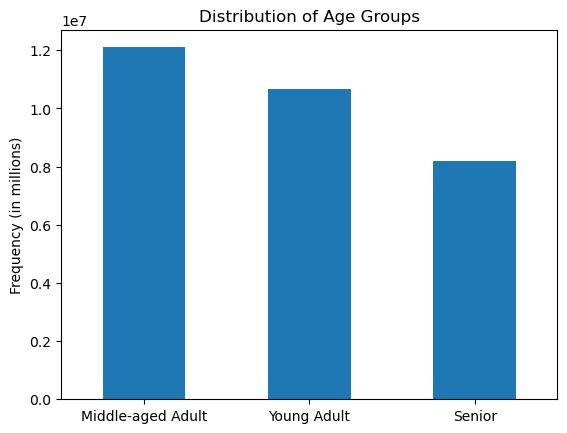

In [86]:
# Create a bar chart for age_group

bar_age_group = high_activity_customers['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Groups')
plt.ylabel('Frequency (in millions)')
plt.xticks(rotation = 0)

In [349]:
# Compare orders by age group and marital status

age_marital_crosstab = pd.crosstab(high_activity_customers['age_group'], high_activity_customers['marital_status'], dropna = False)
age_marital_crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-aged Adult,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young Adult,0,1481172,6523363,2660575


Text(0.5, 0, 'Age Group')

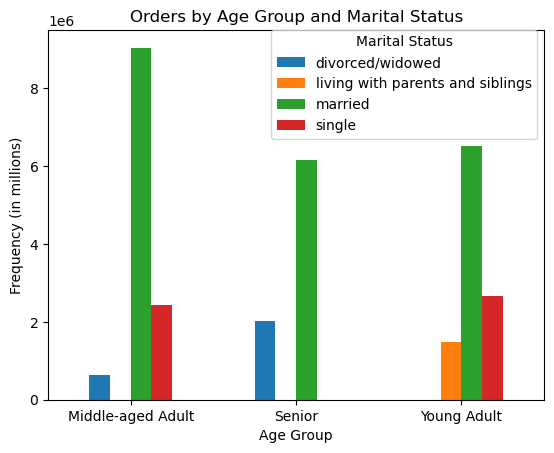

In [350]:
# Create a side by side bar chart for age and marital status

bar_age_martial = age_marital_crosstab.plot(kind = 'bar', rot = 0)
bar_age_martial.legend(title = 'Marital Status', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Orders by Age Group and Marital Status')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Age Group')


## Charts for Income Profile

(array([0, 1, 2]),
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Middle Income'),
  Text(2, 0, 'Upper Income')])

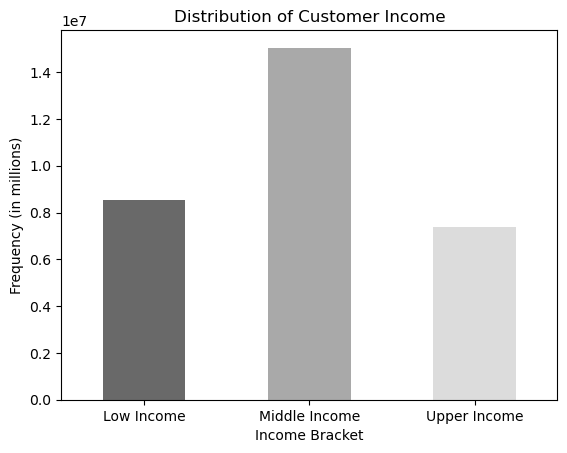

In [87]:
# Create a bar chart for income_bracket

bar_income_group = high_activity_customers['income_bracket'].value_counts().sort_index().plot.bar(color = ['dimgray', 'darkgray', 'gainsboro'])
plt.title('Distribution of Customer Income')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Income Bracket')
plt.xticks(rotation = 0)

## Charts for Goods Profile

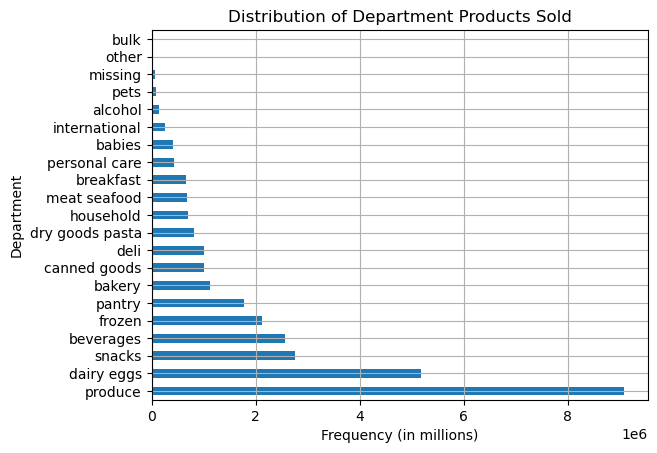

In [88]:
# Create a bar chart for frequency per department

bar_department_frequency = high_activity_customers['department'].value_counts().plot.barh()

plt.title('Distribution of Department Products Sold')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Department')
plt.grid(True)

Text(0.5, 0, 'Price Range')

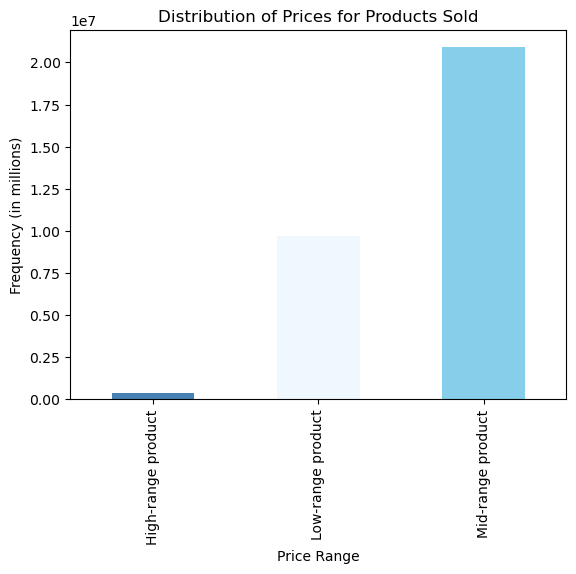

In [251]:
#Create bar chart of price ranges of goods

bar_good_prices = high_activity_customers['price_range_loc'].value_counts().sort_index().plot.bar(color = ['steelblue', 'aliceblue', 'skyblue'])

plt.title('Distribution of Prices for Products Sold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Price Range')

Text(0.5, 1.0, 'Customers Who Purchase Baby Products')

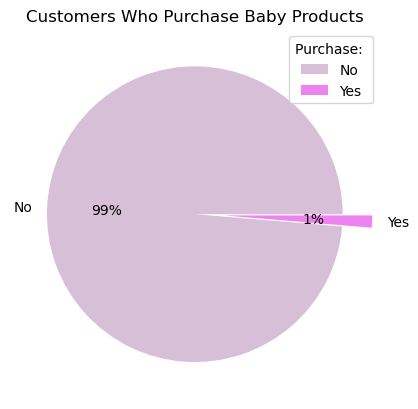

In [90]:
# Create pie chart of customer purchases baby products

pie_baby_products = high_activity_customers['baby_products'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['thistle','violet'], label = '', explode = [0,0.2])
pie_baby_products.legend(title = 'Purchase: ', loc = 'best')
plt.title('Customers Who Purchase Baby Products')

Text(0.5, 1.0, 'Customers Who Purchase Alcohol')

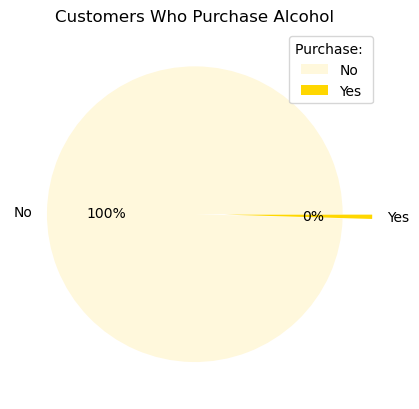

In [91]:
# Create pie chart of customer purchases alcohol

pie_alcohol_purchase = high_activity_customers['alcohol_purchase'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['cornsilk','gold'], label = '', explode = [0,0.2])
pie_alcohol_purchase.legend(title = 'Purchase: ', loc = 'best')
plt.title('Customers Who Purchase Alcohol')

Text(0.5, 1.0, 'Customers Who Purchase Pet Supplies')

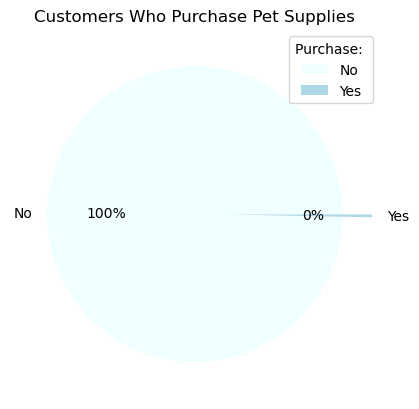

In [92]:
# Create pie chart of customer purchases pet supplies

pie_pet_purchase = high_activity_customers['pet_owner'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['azure','lightblue'], label = '', explode = [0,0.2])
pie_pet_purchase.legend(title = 'Purchase: ', loc = 'best')
plt.title('Customers Who Purchase Pet Supplies')

#### Customers who purchase Alcohol and Pet supplies value is ,<1% therefore does not display 

Text(0.5, 0, 'Alcohol Purchase')

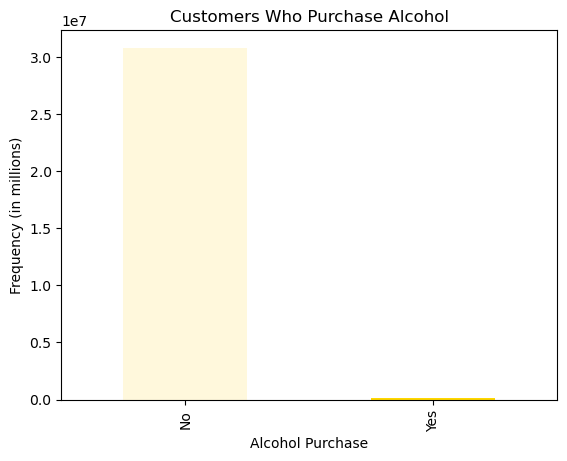

In [93]:
# Create a bar chart for customer purchases alcohol

bar_purchases_alcohol = high_activity_customers['alcohol_purchase'].value_counts().plot.bar(color = ['cornsilk','gold'])

plt.title('Customers Who Purchase Alcohol')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Alcohol Purchase')

Text(0.5, 0, 'Pet Supplies Purchase')

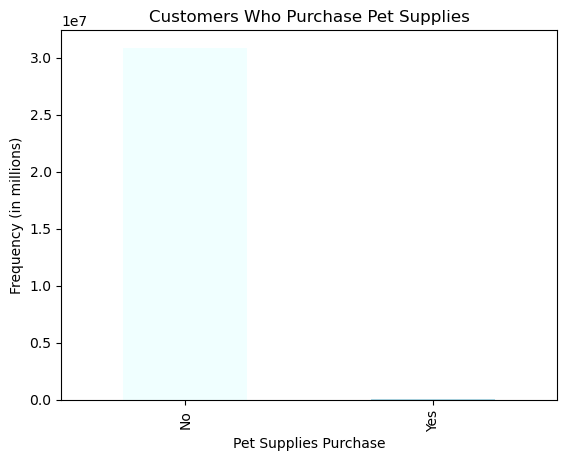

In [94]:
# Create a bar chart for customer purchases pet supples

bar_purchases_pet = high_activity_customers['pet_owner'].value_counts().plot.bar(color = ['azure','lightblue'])

plt.title('Customers Who Purchase Pet Supplies')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Pet Supplies Purchase')

Text(0.5, 1.0, 'Customers Who Purchase Perishables')

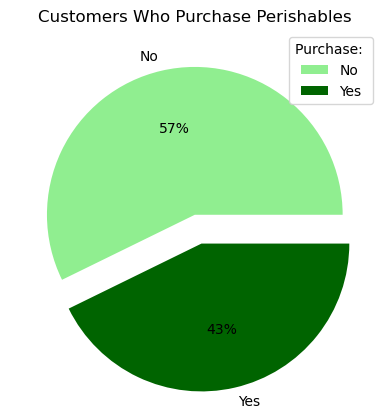

In [95]:
# Create pie chart of customer who purchase perishable items

pie_perishable = high_activity_customers['perishable_items'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'), colors = ['lightgreen','darkgreen'], label = '', explode = [0,0.2])
pie_perishable.legend(title = 'Purchase: ', loc = 'best')
plt.title('Customers Who Purchase Perishables')

## Charts for Family Size using Dependants Profile

(array([0, 1, 2]),
 [Text(0, 0, 'Large'), Text(1, 0, 'Mid-size'), Text(2, 0, 'Small')])

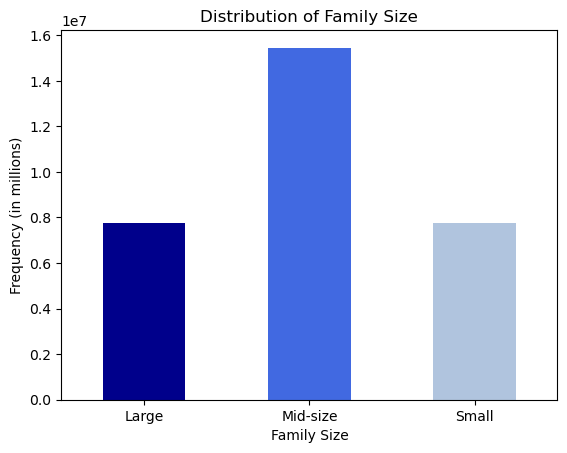

In [96]:
# Create a bar chart for Family size based on number of dependants

bar_income_group = high_activity_customers['family_size'].value_counts().sort_index().plot.bar(color = ['darkblue', 'royalblue', 'lightsteelblue'])
plt.title('Distribution of Family Size')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Family Size')
plt.xticks(rotation = 0)

## Charts for Purchase Times

Text(0.5, 1.0, 'Frequency of Purchase Times Grouped per Day')

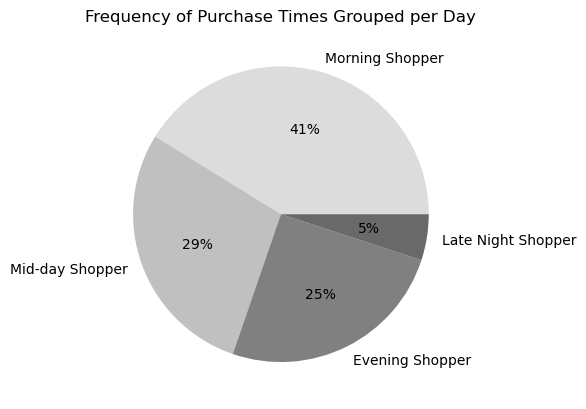

In [244]:
# Create pie chart of Frequency of Purchase Groups per Day

pie_purchase_times_group = high_activity_customers['purchase_times'].value_counts().plot.pie(labels = ['Morning Shopper','Mid-day Shopper', 'Evening Shopper', 'Late Night Shopper'], autopct=('%1.f%%'), colors = ['gainsboro','silver', 'gray', 'dimgray'], label = '')
plt.title('Frequency of Purchase Times Grouped per Day')


# 07. Aggregate of customer-profiles for usage frequency and expenditure

In [98]:
# Age category aggregation with frequency

high_activity_customers.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                               mean min  max
age_group                                   
Middle-aged Adult          8.354216   1  145
Senior                     8.307779   1   99
Young Adult                8.415515   1  109

In [99]:
# Age category aggregation with expenditure

high_activity_customers.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Middle-aged Adult  11.944899  1.0  99999.0
Senior             11.757768  1.0  99999.0
Young Adult        12.055665  1.0  99999.0

In [100]:
# Income category aggregation with frequency

high_activity_customers.groupby('income').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                    mean min max
income                          
25903           1.900000   1   4
25911           3.750000   1  10
25937           4.512821   1  13
25941           2.677419   1   7
25955           6.466837   1  22
...                  ...  ..  ..
584097          7.041162   1  20
590790          5.407407   1  13
591089          5.261364   1  15
592409          7.336478   1  31
593901          6.754688   1  26

[96069 rows x 3 columns]

In [101]:
# Income category aggregation with expenditure

high_activity_customers.groupby('income').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                    mean min max
income                          
25903           1.900000   1   4
25911           3.750000   1  10
25937           4.512821   1  13
25941           2.677419   1   7
25955           6.466837   1  22
...                  ...  ..  ..
584097          7.041162   1  20
590790          5.407407   1  13
591089          5.261364   1  15
592409          7.336478   1  31
593901          6.754688   1  26

[96069 rows x 3 columns]

In [102]:
# Department category aggregation with frequency

high_activity_customers.groupby('department').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
department                                
alcohol                  5.444578   1   90
babies                  10.577894   1   92
bakery                   8.100412   1  127
beverages                6.988362   1  145
breakfast                9.144345   1  133
bulk                     8.394368   1   75
canned goods             9.969112   1  112
dairy eggs               7.504307   1  137
deli                     8.709131   1  142
dry goods pasta         10.233058   1  104
frozen                   9.012000   1  141
household                8.523310   1  115
international            9.955030   1  119
meat seafood             8.546441   1  133
missing                  9.347255   1   95
other                    8.283107   1   81
pantry                   9.606539   1  136
personal care            8.779944   1  125
pets                     7.736331   1  121
produce                  8.035116   1  139
snacks                   9.199468   1  144

In [103]:
# Department category aggregation with expenditure

high_activity_customers.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.150699  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.857482  1.0     15.0
beverages         7.682556  1.0     15.0
breakfast         8.031647  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.114599  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.733725  1.0     15.0
household         7.379951  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300034  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014482  1.0     20.0
personal care     7.998744  1.0     15.0
pets              7.887489  1.0     15.0
produce           7.980348  1.0     15.0
snacks            4.275555  1.6      7.0

In [104]:
# Baby products category aggregation with frequency

high_activity_customers.groupby('baby_products').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                           mean min  max
baby_products                           
No                     8.333289   1  145
Yes                   10.577894   1   92

In [105]:
# Baby products category aggregation with expenditure

high_activity_customers.groupby('baby_products').agg({'prices' : ['mean', 'min', 'max']})

prices              
                    mean  min      max
baby_products                         
No             11.991265  1.0  99999.0
Yes             7.634399  1.0     15.0

In [106]:
# Alcohol purchase products category aggregation with frequency

high_activity_customers.groupby('alcohol_purchase').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
alcohol_purchase                           
No                        8.376734   1  145
Yes                       5.444578   1   90

In [107]:
# Alcohol purchase products category aggregation with expenditure

high_activity_customers.groupby('alcohol_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
alcohol_purchase                         
No                11.951273  1.0  99999.0
Yes                8.150699  1.0     15.0

In [108]:
# Pet supplies purchase products category aggregation with frequency

high_activity_customers.groupby('pet_owner').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
pet_owner                           
No                 8.364928   1  145
Yes                7.736331   1  121

In [109]:
# Pet supplies purchase products category aggregation with expenditure

high_activity_customers.groupby('pet_owner').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
pet_owner                         
No         11.945718  1.0  99999.0
Yes         7.887489  1.0     15.0

In [110]:
# Perishable items purchase products category aggregation with frequency

high_activity_customers.groupby('perishable_items').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
perishable_items                           
Non_perishable            8.870838   1  145
Perishable                7.983829   1  142

In [111]:
# Perishable items purchase products category aggregation with expenditure

high_activity_customers.groupby('perishable_items').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
perishable_items                         
Non_perishable     6.996105  1.0     20.0
Perishable        15.620639  1.0  99999.0

In [112]:
# Number of dependants aggregation with frequency

high_activity_customers.groupby('number_dependants').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                               mean min  max
number_dependants                           
0                          8.336567   1  137
1                          8.383444   1  114
2                          8.357080   1  104
3                          8.375061   1  145

In [113]:
# Number of dependants aggregation with expenditures

high_activity_customers.groupby('number_dependants').agg({'prices' : ['mean', 'min', 'max']})

prices              
                        mean  min      max
number_dependants                         
0                  12.102657  1.0  99999.0
1                  11.555234  1.0  99999.0
2                  12.284472  1.0  99999.0
3                  11.791609  1.0  99999.0

In [114]:
# Family size aggregation with frequency

high_activity_customers.groupby('family_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
family_size                           
Large                8.375061   1  145
Mid-size             8.370250   1  114
Small                8.336567   1  137

In [115]:
# Family size aggregation with expenditure

high_activity_customers.groupby('family_size').agg({'prices' : ['mean', 'min', 'max']})

prices              
                  mean  min      max
family_size                         
Large        11.791609  1.0  99999.0
Mid-size     11.920187  1.0  99999.0
Small        12.102657  1.0  99999.0

In [116]:
# Region aggregation with frequency

high_activity_customers.groupby('region').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
region                              
Midwest            8.353883   1  109
Northeast          8.376380   1  145
South              8.365296   1  137
West               8.359292   1  114

In [117]:
# Region aggregation with expenditure

high_activity_customers.groupby('region').agg({'prices' : ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.681835  1.0  99999.0
Northeast  11.542582  1.0  99999.0
South      12.118845  1.0  99999.0
West       11.276491  1.0  99999.0

# 08. Compare customer profiles with regions 

In [118]:
# Compare age group across various regions

age_region_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['age_group'], dropna = False)
age_region_crosstab

age_group,Middle-aged Adult,Senior,Young Adult
region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


Text(0.5, 0, 'Regions')

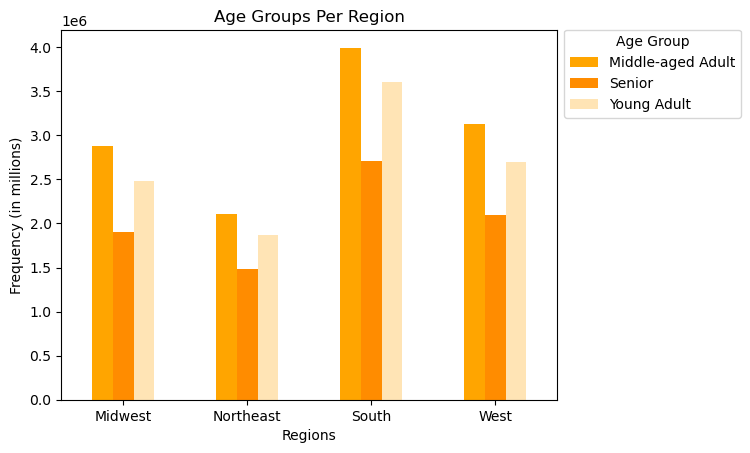

In [119]:
# Create a side by side bar chart for age group and region

bar_age_region = age_region_crosstab.plot(kind = 'bar', rot = 0, color = ['orange', 'darkorange', 'moccasin'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Age Groups Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [120]:
# Compare income group across various regions

income_region_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['income_bracket'], dropna = False)
income_region_crosstab

income_bracket,Low Income,Middle Income,Upper Income
region,,,
Midwest,1974266,3524245,1763002
Northeast,1486808,2669070,1308807
South,2849538,5018800,2442801
West,2209921,3830502,1886804


Text(0.5, 0, 'Regions')

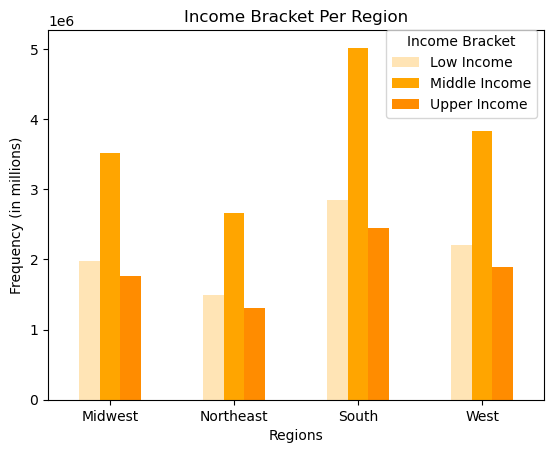

In [121]:
# Create a side by side bar chart for income and region

bar_income_region = income_region_crosstab.plot(kind = 'bar', rot = 0, color = ['moccasin', 'orange', 'darkorange'])
bar_income_region.legend(title = 'Income Bracket', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Income Bracket Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [122]:
# Compare department frequecy across region  

region_department_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['region'], dropna = False)
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


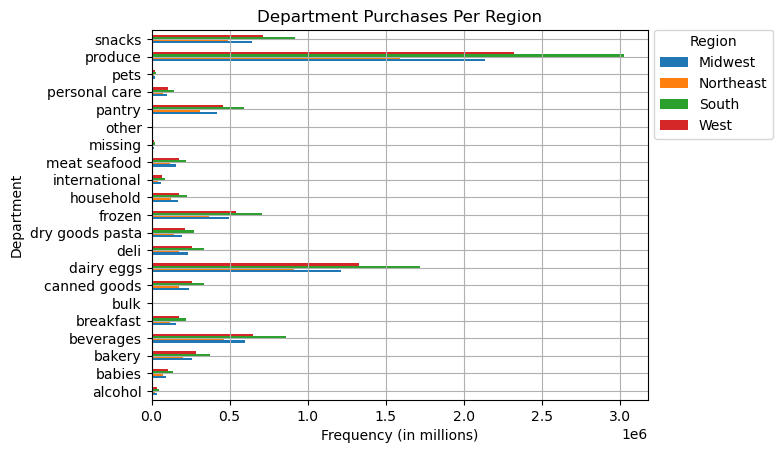

In [352]:
# Create a side by side horizontal bar chart for department frequecy across region  

bar_department_region = region_department_crosstab.plot(kind = 'barh', rot = 0)
bar_department_region.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Department Purchases Per Region')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Department')
plt.grid(True)

In [124]:
# Compare Baby products purchased across region  

region_baby_products_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['baby_products'], dropna = False)
region_baby_products_crosstab

baby_products,No,Yes
region,,
Midwest,7165772,95741
Northeast,5391973,72712
South,10171628,139511
West,7824799,102428


Text(0.5, 0, 'Regions')

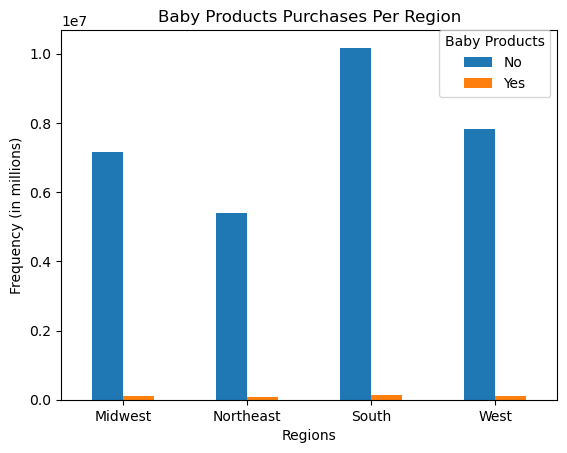

In [125]:
# Create a side by side bar chart for purchase of baby products across the region  

bar_baby_products_region = region_baby_products_crosstab.plot(kind = 'bar', rot = 0)
bar_baby_products_region.legend(title = 'Baby Products', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Baby Products Purchases Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [126]:
# Compare alcohol purchased across region  

region_alcohol_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['alcohol_purchase'], dropna = False)
region_alcohol_crosstab

alcohol_purchase,No,Yes
region,,
Midwest,7227470,34043
Northeast,5439668,25017
South,10262326,48813
West,7890473,36754


Text(0.5, 0, 'Regions')

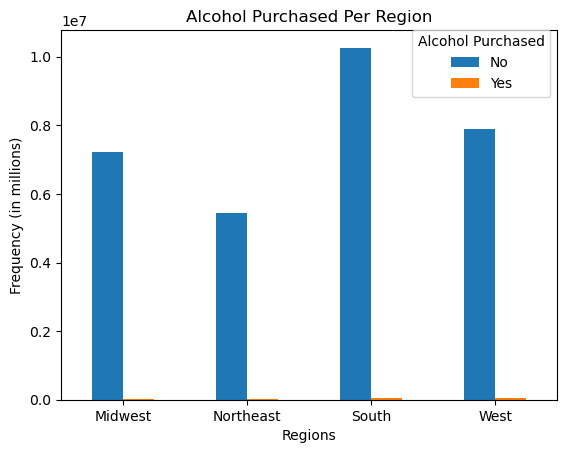

In [127]:
# Create a side by side bar chart for purchase of baby products across the region  

bar_alcohol_purchase_region = region_alcohol_crosstab.plot(kind = 'bar', rot = 0)
bar_alcohol_purchase_region.legend(title = 'Alcohol Purchased', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Alcohol Purchased Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [128]:
# Compare pet owner across region  

region_pet_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['pet_owner'], dropna = False)
region_pet_crosstab

pet_owner,No,Yes
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


Text(0.5, 0, 'Regions')

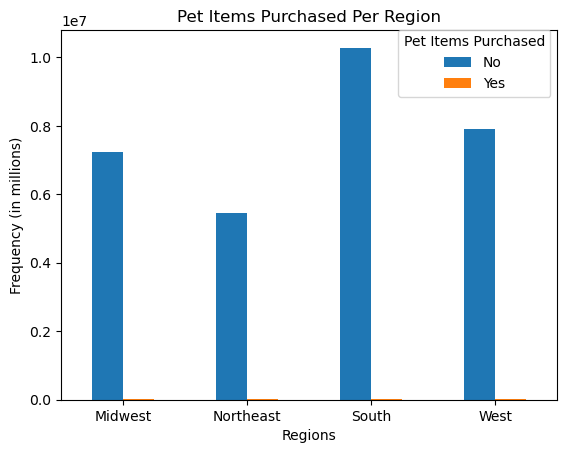

In [129]:
# Create a side by side bar chart for purchase of pet_owner across the region  

bar_petowner_region = region_pet_crosstab.plot(kind = 'bar', rot = 0)
bar_petowner_region.legend(title = 'Pet Items Purchased', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Pet Items Purchased Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [130]:
# Compare perishable items purchased across region  

region_perishable_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['perishable_items'], dropna = False)
region_perishable_crosstab

perishable_items,Non_perishable,Perishable
region,,
Midwest,3104276,4157237
Northeast,2342892,3121793
South,4408115,5903024
West,3382533,4544694


Text(0.5, 0, 'Regions')

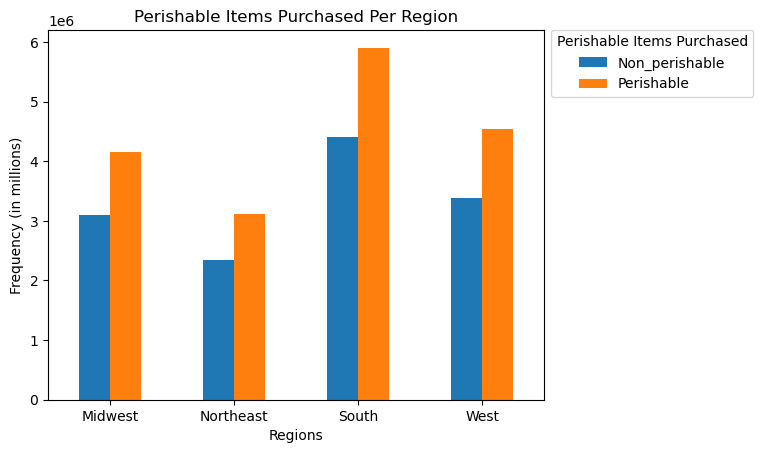

In [131]:
# Create a side by side bar chart for purchase of pet_owner across the region  

bar_perishable_region = region_perishable_crosstab.plot(kind = 'bar', rot = 0)
bar_perishable_region.legend(title = 'Perishable Items Purchased', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Perishable Items Purchased Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [132]:
# Compare parents across region  

region_parents_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['number_dependants'], dropna = False)
region_parents_crosstab

number_dependants,0,1,2,3
region,,,,
Midwest,1822816,1841417,1809994,1787286
Northeast,1354482,1377009,1351961,1381233
South,2581933,2539625,2603717,2585864
West,1980450,1961055,1967589,2018133


Text(0.5, 0, 'Regions')

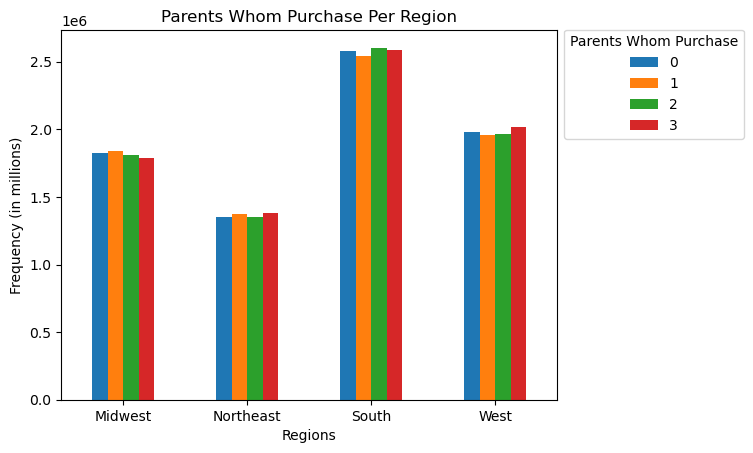

In [133]:
# Create a side by side bar chart for purchase of pet_owner across the region  

bar_parents_region = region_parents_crosstab.plot(kind = 'bar', rot = 0)
bar_parents_region.legend(title = 'Parents Whom Purchase', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Parents Whom Purchase Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [134]:
# Compare family size across region  

region_family_size_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['family_size'], dropna = False)
region_family_size_crosstab

family_size,Large,Mid-size,Small
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


Text(0.5, 0, 'Regions')

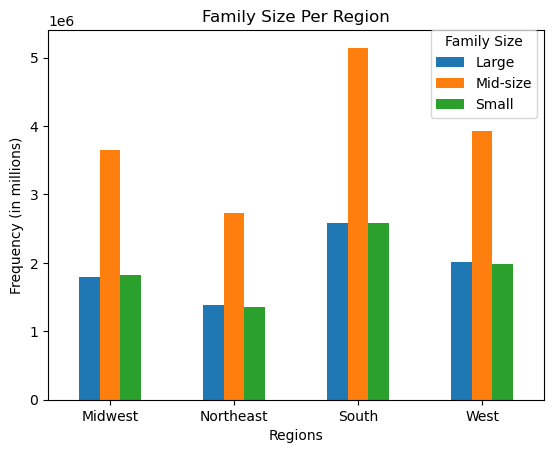

In [135]:
# Create a side by side bar chart for family size across the region  

bar_family_size_region = region_family_size_crosstab.plot(kind = 'bar', rot = 0)
bar_family_size_region.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Family Size Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [136]:
# Compare purchase time across region  

region_purchase_time_crosstab = pd.crosstab(high_activity_customers['region'], high_activity_customers['purchase_times'], dropna = False)
region_purchase_time_crosstab

purchase_times,Evening Shopper,Late Shopper,Mid-day Shopper,Morning Shopper
region,,,,
Midwest,2087935,365567,2982455,1825556
Northeast,1549597,282212,2257140,1375736
South,2942729,518861,4228664,2620885
West,2254847,392305,3285561,1994514


Text(0.5, 0, 'Regions')

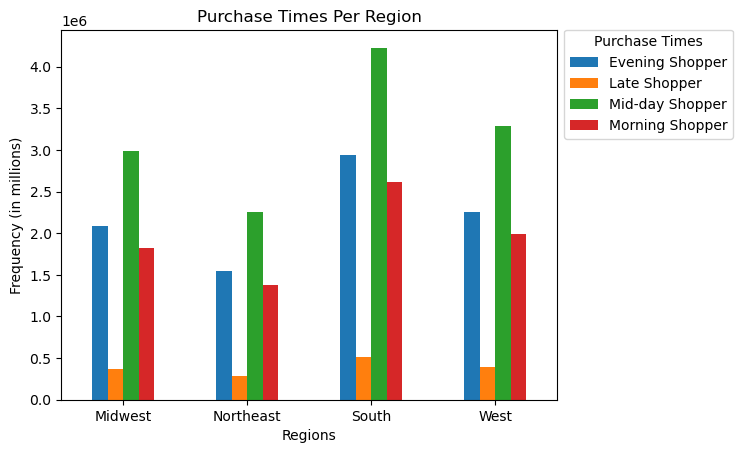

In [137]:
# Create a side by side bar chart for purchase time across the region  

bar_purchase_time_region = region_purchase_time_crosstab.plot(kind = 'bar', rot = 0)
bar_purchase_time_region.legend(title = 'Purchase Times', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase Times Per Region')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

# 09. Compare customer profiles with departments

In [138]:
# Compare age group across various departments

age_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['age_group'], dropna = False)
age_dept_crosstab

age_group,Middle-aged Adult,Senior,Young Adult
department,,,
alcohol,56278,36693,51656
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,263615,175296,231939
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


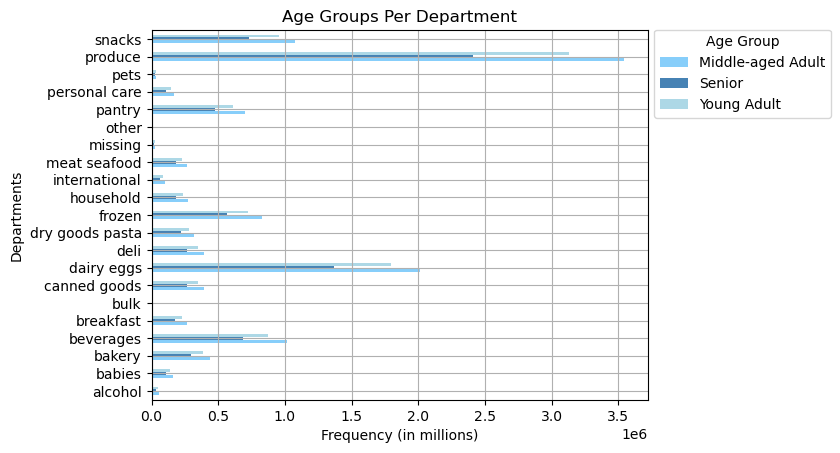

In [139]:
# Create a side by side horizontal bar chart for age group per department

bar_age_dept = age_dept_crosstab.plot(kind = 'barh', rot = 0, color = ['lightskyblue', 'steelblue', 'lightblue'])
bar_age_dept.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Age Groups Per Department')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Departments')
plt.grid(True)

In [141]:
# Compare income group across various departments

income_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['income_bracket'], dropna = False)
income_dept_crosstab

income_bracket,Low Income,Middle Income,Upper Income
department,,,
alcohol,39962,65128,39537
babies,95171,212942,102279
bakery,292666,550639,277523
beverages,804236,1177941,589724
breakfast,204191,310969,155690
bulk,10267,15854,7330
canned goods,248530,509492,254052
dairy eggs,1363806,2555089,1258287
deli,273839,489596,240399


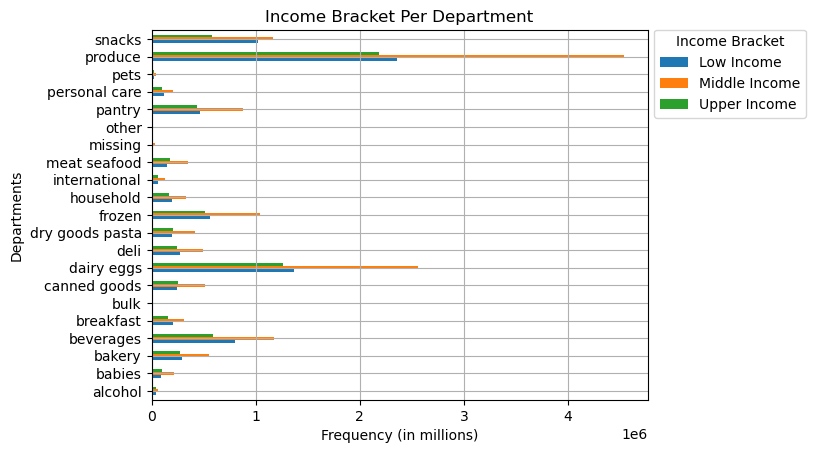

In [142]:
# Create a side by side horizontal bar chart for income group per department

bar_income_dept = income_dept_crosstab.plot(kind = 'barh', rot = 0)
bar_income_dept.legend(title = 'Income Bracket', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Income Bracket Per Department')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Departments')
plt.grid(True)

In [150]:
# Compare parents group across various departments

parent_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['parent'], dropna = False)
parent_dept_crosstab

parent,No,Yes
department,,
alcohol,36827,107800
babies,103328,307064
bakery,281395,839433
beverages,645341,1926560
breakfast,166432,504418
bulk,8000,25451
canned goods,251020,761054
dairy eggs,1294376,3882806
deli,253382,750452


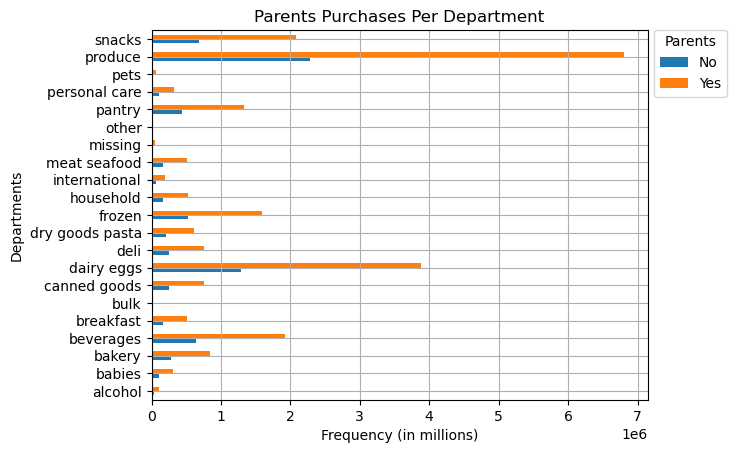

In [151]:
# Create a side by side horizontal bar chart for parents group per department

bar_parent_dept = parent_dept_crosstab.plot(kind = 'barh', rot = 0)
bar_parent_dept.legend(title = 'Parents', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Parents Purchases Per Department')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Departments')
plt.grid(True)

In [152]:
# Compare family size across various departments

family_size_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['family_size'], dropna = False)
family_size_dept_crosstab

family_size,Large,Mid-size,Small
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


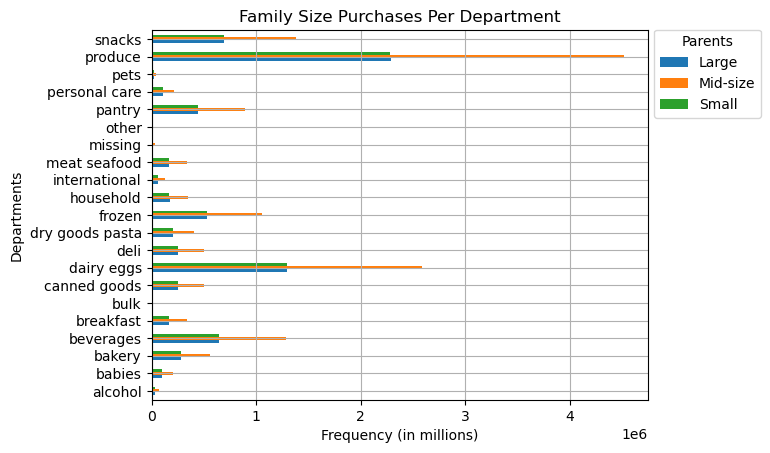

In [153]:
# Create a side by side horizontal bar chart for family size per department

bar_family_size_dept = family_size_dept_crosstab.plot(kind = 'barh', rot = 0)
bar_family_size_dept.legend(title = 'Parents', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Family Size Purchases Per Department')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Departments')
plt.grid(True)

In [154]:
# Compare family size across various departments

purchase_times_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['purchase_times'], dropna = False)
purchase_times_dept_crosstab

purchase_times,Evening Shopper,Late Shopper,Mid-day Shopper,Morning Shopper
department,,,,
alcohol,43469,3756,67165,30237
babies,114979,21495,158082,115836
bakery,320547,52456,463355,284470
beverages,723765,118203,1059015,670918
breakfast,188962,32609,266133,183146
bulk,9426,1777,13603,8645
canned goods,283114,51963,433526,243471
dairy eggs,1459035,254269,2095914,1367964
deli,292803,49317,416846,244868


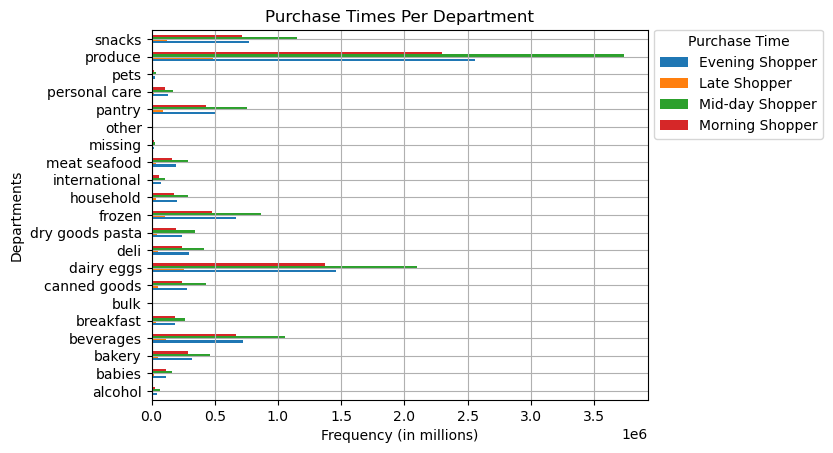

In [155]:
# Create a side by side horizontal bar chart for family size per department

bar_purchase_times_dept = purchase_times_dept_crosstab.plot(kind = 'barh', rot = 0)
bar_purchase_times_dept.legend(title = 'Purchase Time', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase Times Per Department')
plt.xlabel('Frequency (in millions)')
plt.ylabel('Departments')
plt.grid(True)

# 10. Compare customer profiles with order days of week and hours of day

In [156]:
# Age category aggregation with frequency

high_activity_customers.groupby('age_group').agg({'orders_day_of_week' : ['mean', 'min', 'max']})

orders_day_of_week        
                                mean min max
age_group                                   
Middle-aged Adult           2.744650   0   6
Senior                      2.747122   0   6
Young Adult                 2.733304   0   6

In [161]:
# Compare age groups across orders day of week

age_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['age_group'], dropna = False)
age_odow_crosstab

age_group,Middle-aged Adult,Senior,Young Adult
orders_day_of_week,,,
0,2301009,1566244,2041357
1,2112438,1417495,1881753
2,1583124,1065170,1376412
3,1431181,978350,1260004
4,1415669,956161,1253164
5,1576837,1066115,1390777
6,1683652,1146009,1461643


Text(0.5, 0, 'Day of Week')

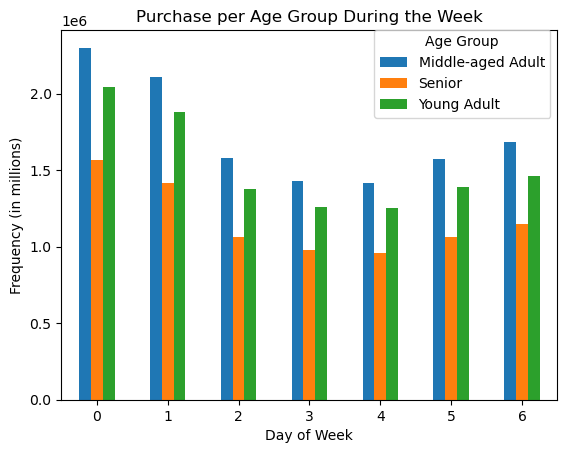

In [261]:
# Create a side by side bar chart for age groups across orders day of week  

bar_age_odow = age_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_age_odow.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Age Group During the Week')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Day of Week')

In [164]:
# Compare age groups across order hour of day

age_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['age_group'], dropna = False)
age_ohod_crosstab

age_group,Middle-aged Adult,Senior,Young Adult
order_hour_of_day,,,
0,81020,53395,73627
1,42296,28688,38637
2,24856,17458,23377
3,18296,13395,17105
4,19464,13680,17619
5,32214,23286,28918
6,107056,75229,98728
7,334791,233067,295355
8,650839,441458,566813


Text(0.5, 0, 'Hour of Day')

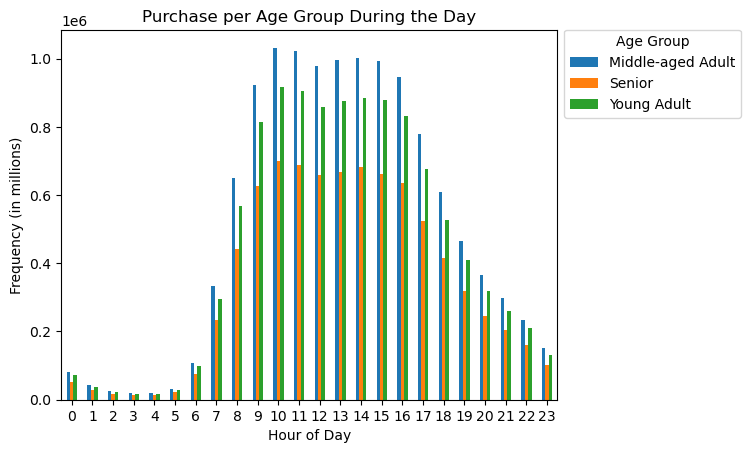

In [262]:
# Create a side by side bar chart for age groups across order hour of day  

bar_age_ohod = age_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_age_ohod.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Age Group During the Day')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Hour of Day')

In [166]:
# Compare income brackes across orders day of week

income_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['income_bracket'], dropna = False)
income_odow_crosstab

income_bracket,Low Income,Middle Income,Upper Income
orders_day_of_week,,,
0,1500105,2962320,1446185
1,1575444,2568638,1267604
2,1144197,1930638,949871
3,1035842,1759681,874012
4,1024861,1737483,862650
5,1145120,1941943,946666
6,1094964,2141914,1054426


Text(0.5, 0, 'Day of Week')

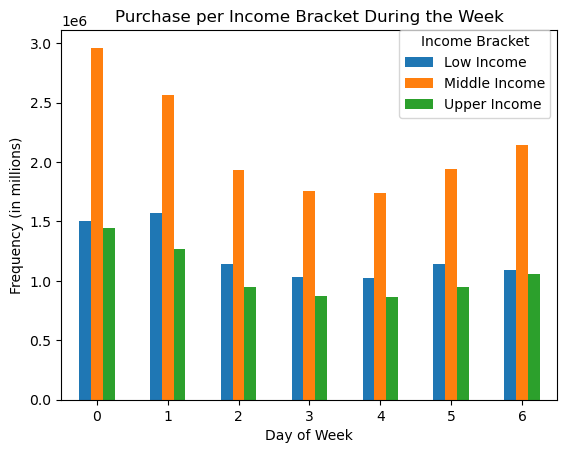

In [263]:
# Create a side by side bar chart for income brackets across orders day of week

bar_income_odow = income_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_income_odow.legend(title = 'Income Bracket', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Income Bracket During the Week')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Day of Week')

In [168]:
# Compare income brackes across order hour of day

income_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['income_bracket'], dropna = False)
income_ohod_crosstab

income_bracket,Low Income,Middle Income,Upper Income
order_hour_of_day,,,
0,55708,103512,48822
1,29479,55172,24970
2,19145,30796,15750
3,13499,23799,11498
4,13794,24479,12490
5,22551,41658,20209
6,76006,137916,67091
7,228945,427902,206366
8,456731,806881,395498


Text(0.5, 0, 'Hour of Day')

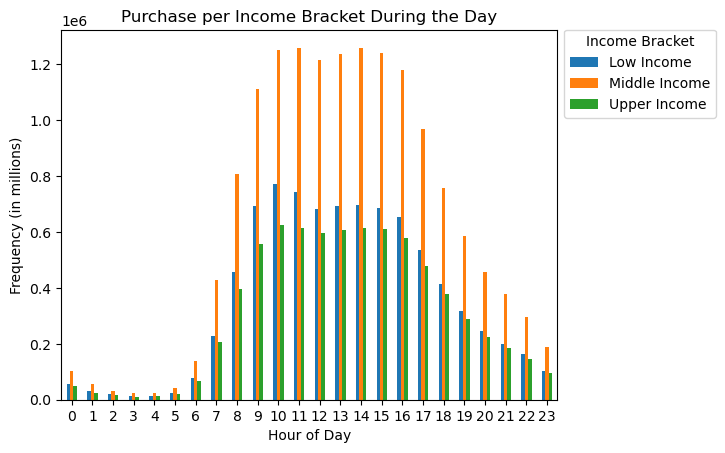

In [264]:
# Create a side by side bar chart for income brackets across order hour of day

bar_income_ohod = income_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_income_ohod.legend(title = 'Income Bracket', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Income Bracket During the Day')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Hour of Day')

In [171]:
# Compare departments across orders day of week

dept_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['department'], dropna = False)
dept_odow_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,
0,16176,78926,214438,412091,119516,5921,216023,971291,199582,172536,...,119160,52982,143933,12294,5751,333468,76086,16257,1865181,461049
1,19400,70692,194647,462953,122583,6137,170213,916406,176457,140174,...,115058,44083,113318,10671,5675,289903,68613,13851,1612409,516477
2,19223,54979,145113,355499,90631,4406,125389,677539,129217,105109,...,95193,32662,82563,8079,4699,228921,56915,11437,1146996,382618
3,21197,50731,132682,329897,82367,4104,112978,613619,116505,93632,...,90598,30040,74024,7803,4378,216451,54400,11971,1024229,345530
4,24815,49949,131372,325745,81044,3856,109650,609636,114498,91277,...,88584,28166,73421,7640,4345,214721,52286,11889,1011420,343220
5,25812,49870,146926,360712,89639,4471,122702,684160,128893,98738,...,94409,31292,83886,8874,4790,237134,55167,13018,1136699,379580
6,18004,55245,155650,325004,85070,4556,155119,704531,138682,120670,...,96855,36766,103636,9407,4773,262107,60839,14637,1282339,337932


Text(0.5, 0, 'Frequency (in millions)')

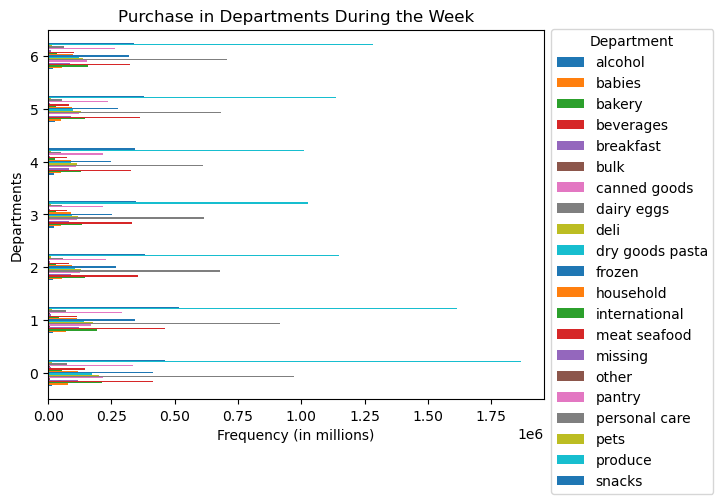

In [265]:
# Create a side by side horizontal bar chart for departments across orders day of week

bar_dept_odow = dept_odow_crosstab.plot(kind = 'barh', rot = 0)
bar_dept_odow.legend(title = 'Department', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase in Departments During the Week')
plt.ylabel('Departments')
plt.xlabel('Frequency (in millions)')

In [185]:
# Compare departments across order hour of day

dept_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['department'], dropna = False)
dept_ohod_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,465,2317,6958,16652,4131,231,6797,33150,6573,5545,...,4739,1795,4490,521,232,12950,3115,642,65073,16877
1,293,1085,3576,9518,2218,114,3655,16828,3478,2884,...,2722,961,2277,294,129,6845,1864,416,33345,8691
2,246,616,2282,5890,1318,66,2254,10162,2142,1699,...,1784,558,1465,156,113,4163,1125,247,18986,5336
3,177,457,1734,4468,1008,49,1621,7671,1537,1221,...,1353,483,1050,122,67,3049,862,252,13729,3990
4,175,534,1824,4584,1059,46,1738,7748,1578,1379,...,1530,427,1121,143,62,3109,973,269,14664,3839
5,260,1076,2967,7108,1797,75,2742,13778,2659,2059,...,2180,672,1775,180,99,4801,1397,302,25924,6372
6,645,4794,10415,22202,6546,314,8619,49797,8667,7263,...,6569,2151,6027,588,305,15367,3980,948,84649,22541
7,2021,16310,33029,66553,20865,889,25924,154902,26410,22399,...,20036,6215,18795,1792,877,46324,11700,2389,260886,70141
8,5046,28008,61396,135182,39506,1779,50974,296832,51248,41331,...,37854,12117,35620,3244,1736,90178,21953,4298,494234,145686


Text(0.5, 0, 'Hour of Day')

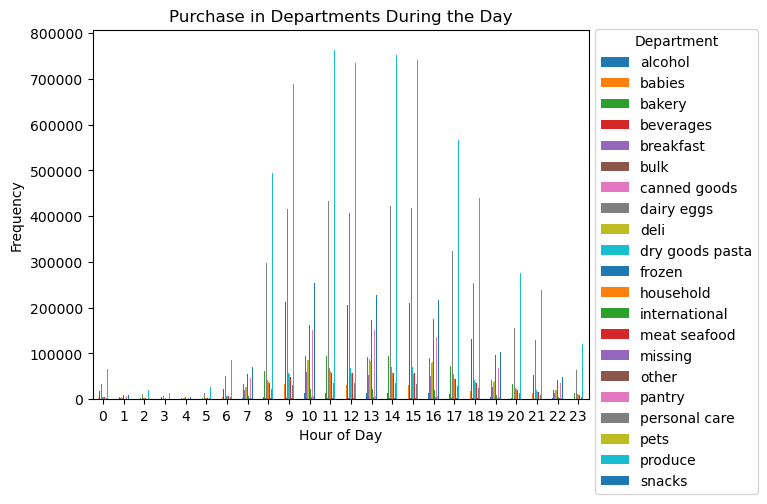

In [266]:
# Create a side by side horizontal bar chart for departments across order hour of day

bar_dept_ohod = dept_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_dept_ohod.legend(title = 'Department', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase in Departments During the Day')
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')

In [187]:
# Compare parents across orders day of week

parent_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['parent'], dropna = False)
parent_odow_crosstab

parent,No,Yes
orders_day_of_week,,
0,1477078,4431532
1,1362350,4049336
2,1002581,3022125
3,917042,2752493
4,905259,2719735
5,1014174,3019555
6,1061197,3230107


Text(0.5, 0, 'Day of Week')

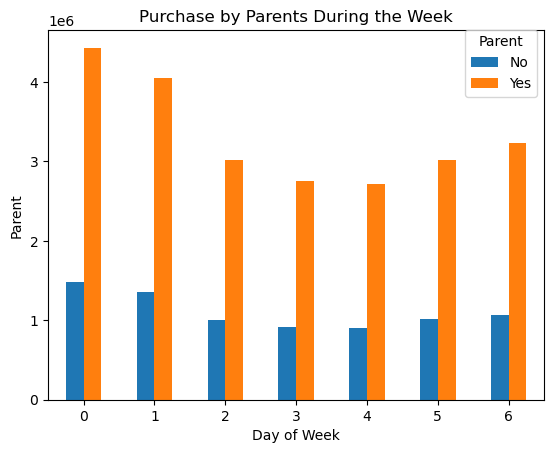

In [188]:
# Create a side by side bar chart for parents across orders day of week

bar_parent_odow = parent_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_parent_odow.legend(title = 'Parent', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase by Parents During the Week')
plt.ylabel('Parent')
plt.xlabel('Day of Week')

In [189]:
# Compare parents across order hour of day

parent_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['parent'], dropna = False)
parent_ohod_crosstab

parent,No,Yes
order_hour_of_day,,
0,51434,156608
1,26731,82890
2,16732,48959
3,12375,36421
4,12205,38558
5,21284,63134
6,70870,210143
7,220071,643142
8,415947,1243163


Text(0.5, 0, 'Hour of day')

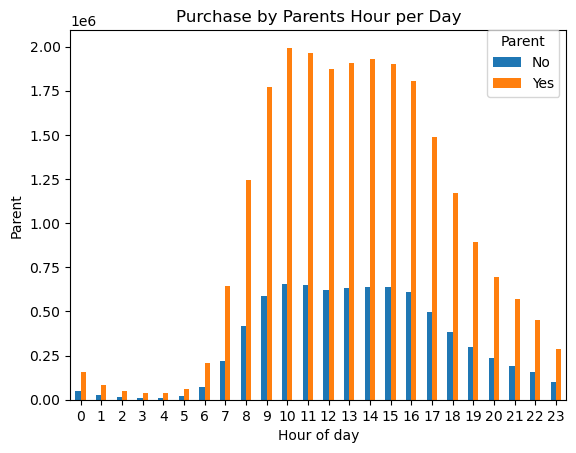

In [190]:
# Create a side by side bar chart for parents across order hour of day

bar_parent_ohod = parent_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_parent_ohod.legend(title = 'Parent', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase by Parents Hour per Day')
plt.ylabel('Parent')
plt.xlabel('Hour of day')

In [191]:
# Compare family size across orders day of week

family_size_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['family_size'], dropna = False)
family_size_odow_crosstab

family_size,Large,Mid-size,Small
orders_day_of_week,,,
0,1489437,2942095,1477078
1,1362820,2686516,1362350
2,1019060,2003065,1002581
3,918747,1833746,917042
4,904116,1815619,905259
5,1001099,2018456,1014174
6,1077237,2152870,1061197


Text(0.5, 0, 'Day of Week')

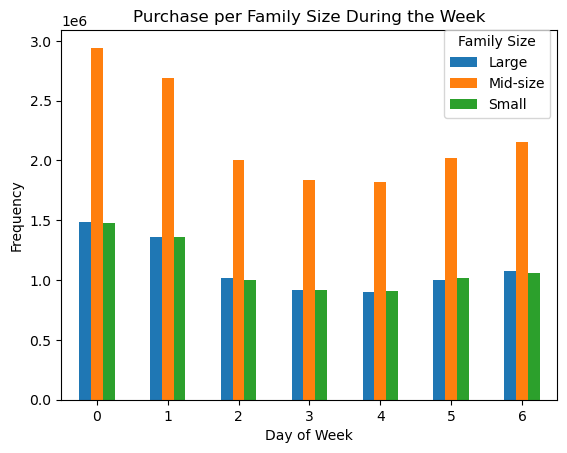

In [267]:
# Create a side by side bar chart for family size across orders day of week

bar_family_size_odow = family_size_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_family_size_odow.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Family Size During the Week')
plt.ylabel('Frequency')
plt.xlabel('Day of Week')

In [193]:
# Compare family size across order hour of day

family_size_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['family_size'], dropna = False)
family_size_ohod_crosstab

family_size,Large,Mid-size,Small
order_hour_of_day,,,
0,52225,104383,51434
1,27920,54970,26731
2,15935,33024,16732
3,12370,24051,12375
4,12692,25866,12205
5,21684,41450,21284
6,70519,139624,70870
7,215012,428130,220071
8,418005,825158,415947


Text(0.5, 0, 'Hour of Day')

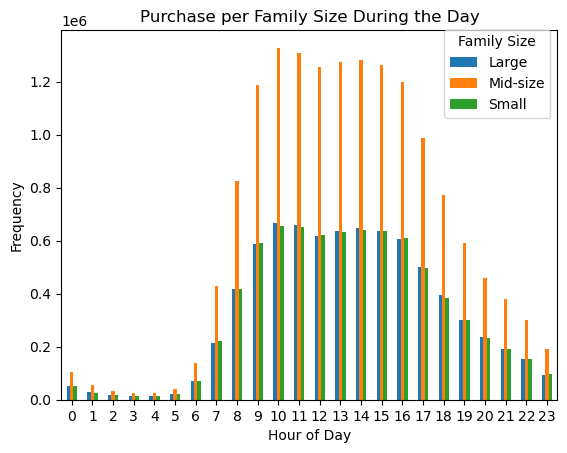

In [268]:
# Create a side by side bar chart for family size across order hour of day 

bar_family_size_ohod = family_size_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_family_size_ohod.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase per Family Size During the Day')
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')

In [195]:
# Compare purchase times across orders day of week

purchase_times_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['purchase_times'], dropna = False)
purchase_times_odow_crosstab

purchase_times,Evening Shopper,Late Shopper,Mid-day Shopper,Morning Shopper
orders_day_of_week,,,,
0,1645609,281797,2606741,1374463
1,1408852,232502,2219156,1551176
2,1176128,202913,1607506,1038159
3,1109851,195403,1458322,905959
4,1114131,206099,1416102,888662
5,1153393,208871,1639594,1031871
6,1227144,231360,1806399,1026401


Text(0.5, 0, 'Day of Week')

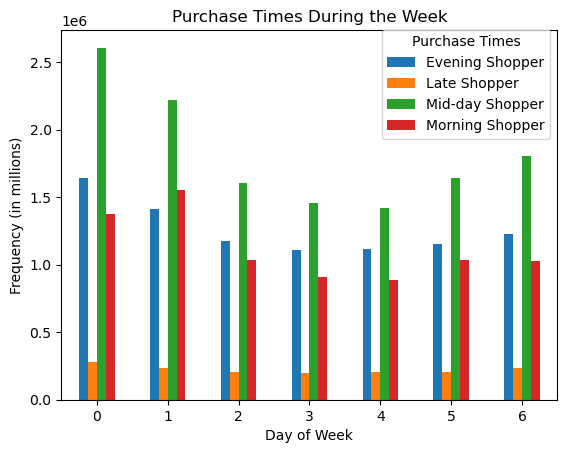

In [269]:
# Create a side by side bar chart for family size across orders day of week

bar_purchase_times_odow = purchase_times_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_purchase_times_odow.legend(title = 'Purchase Times', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase Times During the Week')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Day of Week')

In [197]:
# Compare purchase times across order hour of day

purchase_times_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['purchase_times'], dropna = False)
purchase_times_ohod_crosstab

purchase_times,Evening Shopper,Late Shopper,Mid-day Shopper,Morning Shopper
order_hour_of_day,,,,
0,0,208042,0,0
1,0,109621,0,0
2,0,65691,0,0
3,0,48796,0,0
4,0,50763,0,0
5,0,84418,0,0
6,0,0,0,281013
7,0,0,0,863213
8,0,0,0,1659110


Text(0.5, 0, 'Hour of Day')

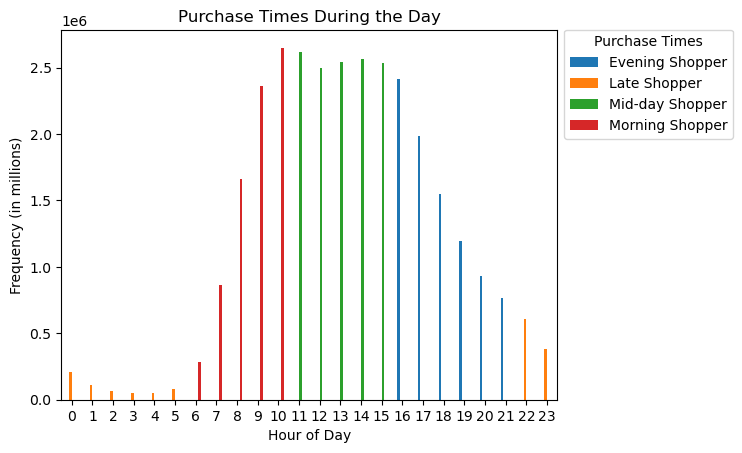

In [270]:
# Create a side by side bar chart for purchase times across order hour of day 

bar_purchase_times_ohod = purchase_times_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_purchase_times_ohod.legend(title = 'Purchase Times', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Purchase Times During the Day')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Hour of Day')

# 11. Customer Loyalty Profile

In [258]:
# Compare customer loyalty across orders day of week

loyalty_odow_crosstab = pd.crosstab(high_activity_customers['orders_day_of_week'], high_activity_customers['loyalty_flag'], dropna = False)
loyalty_odow_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


Text(0, 0.5, 'Frequeny (in millions)')

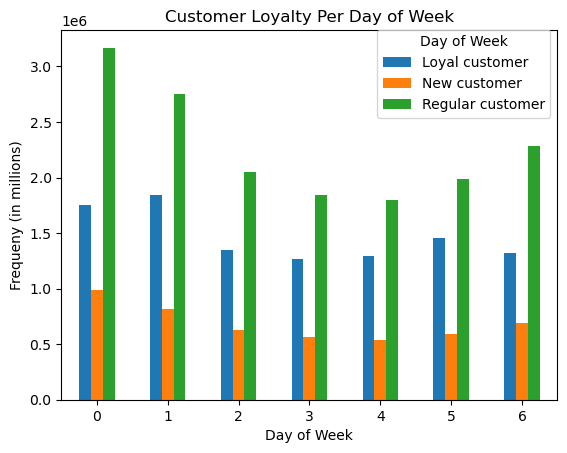

In [260]:
# Create a side by side bar chart for customer loyalty across orders day of week

bar_loyalty_odow = loyalty_odow_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_odow.legend(title = 'Day of Week', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequeny (in millions)')

In [278]:
# Compare customer loyalty across order hour of day

loyalty_ohod_crosstab = pd.crosstab(high_activity_customers['order_hour_of_day'], high_activity_customers['loyalty_flag'], dropna = False)
loyalty_ohod_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


Text(0, 0.5, 'Frequeny (in millions)')

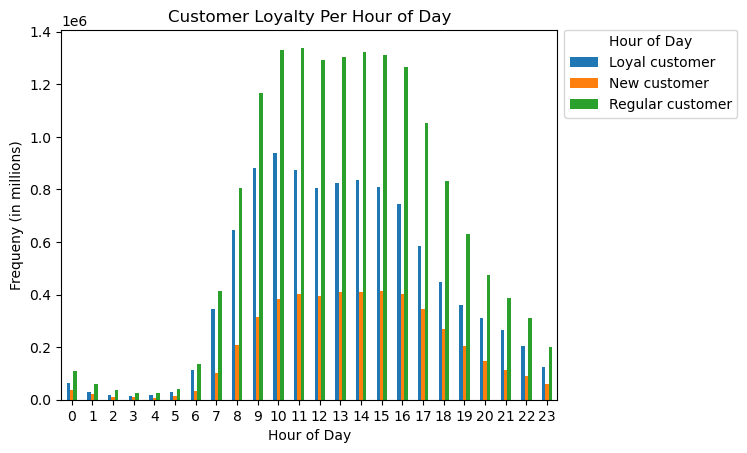

In [280]:
# Create a side by side bar chart for customer loyalty across order hour of day

bar_loyalty_ohod = loyalty_ohod_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_ohod.legend(title = 'Hour of Day', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequeny (in millions)')

In [284]:
# Compare customer loyalty across departments

loyalty_dept_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['loyalty_flag'], dropna = False)
loyalty_dept_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

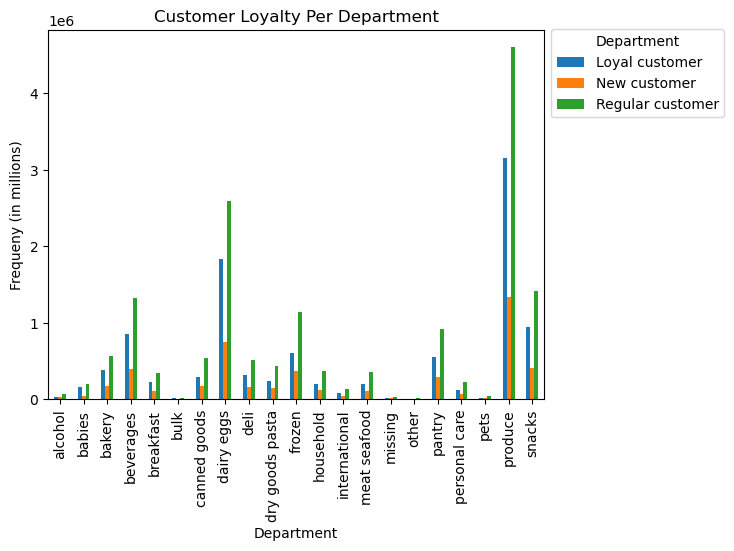

In [286]:
# Create a side by side bar chart for customer loyalty across departments

bar_loyalty_dept = loyalty_dept_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_dept.legend(title = 'Department', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Department')
plt.xlabel('Department')
plt.ylabel('Frequeny (in millions)')
plt.xticks(rotation = 90)

In [289]:
# Compare customer loyalty across product prices

loyalty_prices_crosstab = pd.crosstab(high_activity_customers['loyalty_flag'], high_activity_customers['price_range_loc'], dropna = False)
loyalty_prices_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


Text(0, 0.5, 'Frequeny (in millions)')

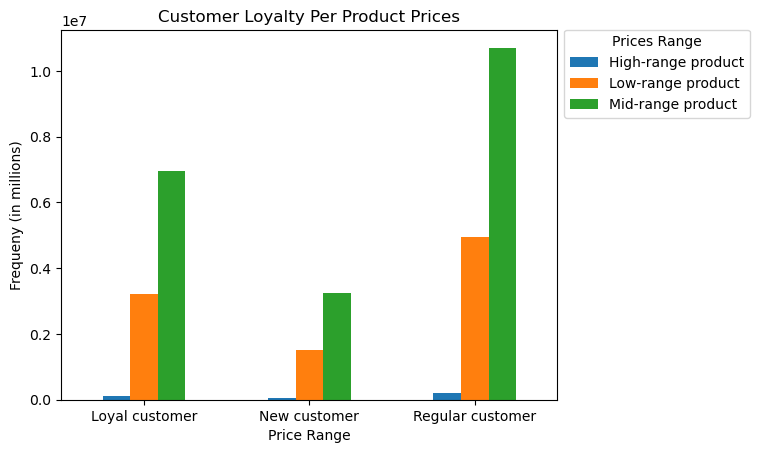

In [290]:
# Create a side by side bar chart for customer loyalty across 

bar_loyalty_prices = loyalty_prices_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_prices.legend(title = 'Prices Range', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Product Prices')
plt.xlabel('Price Range')
plt.ylabel('Frequeny (in millions)')

In [291]:
# Compare customer loyalty across age

loyalty_age_crosstab = pd.crosstab(high_activity_customers['loyalty_flag'], high_activity_customers['age_group'], dropna = False)
loyalty_age_crosstab

age_group,Middle-aged Adult,Senior,Young Adult
loyalty_flag,,,
Loyal customer,4040749,2723958,3519386
New customer,1887302,1276659,1639734
Regular customer,6175859,4194927,5505990


Text(0, 0.5, 'Frequeny (in millions)')

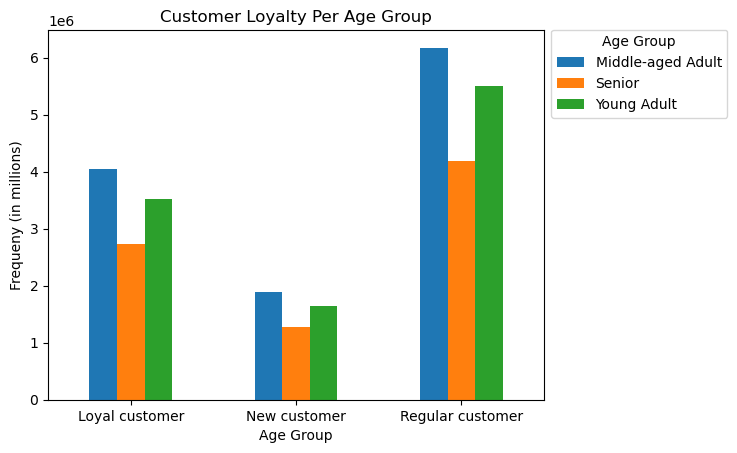

In [292]:
# Create a side by side bar chart for customer loyalty across 

bar_loyalty_age = loyalty_age_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_age.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequeny (in millions)')

In [293]:
# Compare customer loyalty across income

loyalty_income_crosstab = pd.crosstab(high_activity_customers['loyalty_flag'], high_activity_customers['income_bracket'], dropna = False)
loyalty_income_crosstab

income_bracket,Low Income,Middle Income,Upper Income
loyalty_flag,,,
Loyal customer,2764201,5054245,2465647
New customer,1425654,2257012,1121029
Regular customer,4330678,7731360,3814738


Text(0, 0.5, 'Frequeny (in millions)')

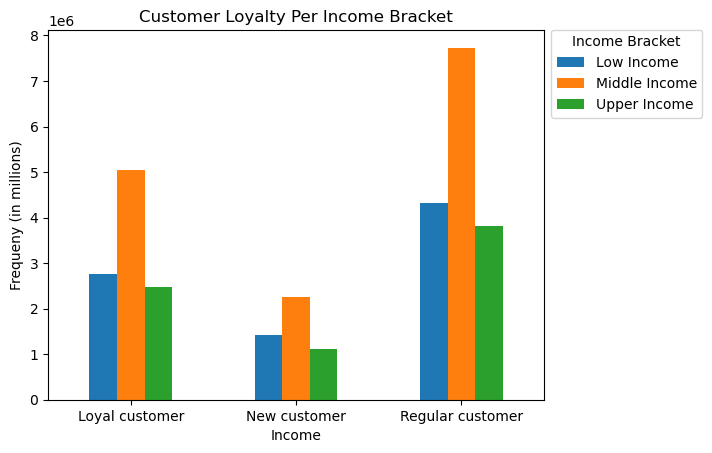

In [294]:
# Create a side by side bar chart for customer loyalty across 

bar_loyalty_income = loyalty_income_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_income.legend(title = 'Income Bracket', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Income Bracket')
plt.xlabel('Income')
plt.ylabel('Frequeny (in millions)')

In [295]:
# Compare customer loyalty across purchase times

loyalty_purchase_times_crosstab = pd.crosstab(high_activity_customers['loyalty_flag'], high_activity_customers['purchase_times'], dropna = False)
loyalty_purchase_times_crosstab

purchase_times,Evening Shopper,Late Shopper,Mid-day Shopper,Morning Shopper
loyalty_flag,,,,
Loyal customer,2711798,499003,4149429,2923863
New customer,1482558,250019,2031371,1039747
Regular customer,4640752,809923,6573020,3853081


Text(0, 0.5, 'Frequeny (in millions)')

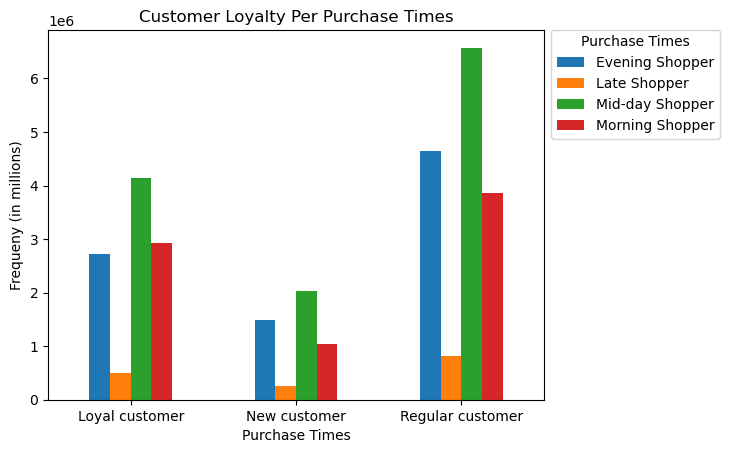

In [296]:
# Create a side by side bar chart for customer loyalty across 

bar_loyalty_purchase_times = loyalty_purchase_times_crosstab.plot(kind = 'bar', rot = 0)
bar_loyalty_purchase_times.legend(title = 'Purchase Times', bbox_to_anchor = (1, 1.02), loc = 'best')
plt.title('Customer Loyalty Per Purchase Times')
plt.xlabel('Purchase Times')
plt.ylabel('Frequeny (in millions)')

# 12. Exporting Dataframes

In [298]:
# Exporting dataframe high_activity_customers as pickle file

high_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))

# 13. Exporting the visualizations as “.png” files in the relevant project folder

In [299]:
bar_age_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_age_group.png'))

In [300]:
bar_income_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_income_group.png'))

In [301]:
bar_department_frequency.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_department_frequency.png'))

In [302]:
bar_good_prices.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_good_prices.png'))

In [303]:
pie_baby_products.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'piechart_baby_products.png'))

In [304]:
pie_alcohol_purchase.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'piechart_alcohol_purchase.png'))

In [305]:
pie_pet_purchase.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'piechart_pet_purchase.png'))

In [306]:
bar_purchases_alcohol.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_purchases_alcohol.png'))

In [307]:
bar_purchases_pet.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_purchases_pet.png'))

In [308]:
pie_perishable.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'piechart_perishable_foods.png'))

In [309]:
bar_income_group.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_income_group.png'))

In [310]:
pie_purchase_times_group.figure.savefig(os.path.join(path,'Analysis','Visualization', 'piechart_purchase_times_group.png'))

In [311]:
bar_age_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_age_region.png'))

In [312]:
bar_income_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_income_region.png'))

In [313]:
bar_baby_products_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_baby_products_region.png'))

In [314]:
bar_alcohol_purchase_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_alcohol_purchase_region.png'))

In [315]:
bar_petowner_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_petowner_region.png'))

In [316]:
bar_perishable_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_perishable_region.png'))

In [317]:
bar_family_size_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_family_size_region.png'))

In [318]:
bar_purchase_time_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_purchase_time_region.png'))

In [319]:
bar_age_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_age_dept.png'))

In [320]:
bar_income_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_income_dept.png'))

In [321]:
bar_parent_dept.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_parent_dept.png'))

In [322]:
bar_family_size_dept.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_family_size_dept.png'))

In [323]:
bar_purchase_times_dept.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_purchase_times_dept.png'))

In [324]:
bar_age_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_age_odow.png'))

In [325]:
bar_age_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_age_ohod.png'))

In [326]:
bar_income_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_income_odow.png'))

In [327]:
bar_income_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_income_ohod.png'))

In [328]:
bar_dept_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_dept_odow.png'))

In [329]:
bar_dept_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_dept_ohod.png'))

In [330]:
bar_parent_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_parent_odow.png'))

In [331]:
bar_parent_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_parent_ohod.png'))

In [332]:
bar_family_size_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_family_size_odow.png'))

In [333]:
bar_family_size_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_family_size_ohod.png'))

In [334]:
bar_purchase_times_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_purchase_times_odow.png'))

In [335]:
bar_purchase_times_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_purchase_times_ohod.png'))

In [339]:
bar_loyalty_odow.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_odow.png'))

In [340]:
bar_loyalty_ohod.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_ohod.png'))

In [341]:
bar_loyalty_dept.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_dept.png'))

In [342]:
bar_loyalty_prices.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_prices.png'))

In [343]:
bar_loyalty_age.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_age.png'))

In [344]:
bar_loyalty_income.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_income.png'))

In [345]:
bar_loyalty_purchase_times.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_loyalty_purchase_times.png'))

In [351]:
bar_age_martial.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_age_martial.png'))

In [353]:
bar_department_region.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_department_region.png'))

In [354]:
bar_parents_region.figure.savefig(os.path.join(path,'Analysis', 'Visualization', 'bar_parents_region.png'))